In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
train_data = pd.read_csv('/content/train (1).csv')
val_data = pd.read_csv('/content/val.csv')
print(train_data.head())
print(val_data.head())

         date        value
0  1985-01-29  1552.519959
1  1985-01-30  1576.070007
2  1985-01-31  1561.440002
3  1985-02-01  1554.839935
4  1985-02-04  1550.879944
         date         value
0  2010-03-26  13248.020019
1  2010-03-29  13253.000489
2  2010-03-30  13301.709472
3  2010-03-31  13310.319824
4  2010-04-01  13268.989502


In [3]:
train_set = train_data.iloc[:,1:2].values
print(train_set[0:5])

[[1552.519959]
 [1576.070007]
 [1561.440002]
 [1554.839935]
 [1550.879944]]


In [4]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled[0:5])

[[0.00191035]
 [0.00343487]
 [0.00248779]
 [0.00206053]
 [0.00180418]]


In [5]:
print(len(train_set_scaled))

6344


In [6]:
X_train = []
Y_train = []

for i in range(60,len(train_set_scaled)):
  X_train.append(train_set_scaled[i-60:i,0])
  Y_train.append(train_set_scaled[i,0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(6284, 60)
(6284,)


In [7]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

(6284, 60, 1)


In [8]:
val_set = val_data.iloc[:,1:2].values
print(val_set[0:5])

[[13248.020019]
 [13253.000489]
 [13301.709472]
 [13310.319824]
 [13268.989502]]


In [9]:
val_set_scaled = sc.transform(val_set)
print(val_set_scaled[0:5])

[[0.75902563]
 [0.75934804]
 [0.76250125]
 [0.76305864]
 [0.7603831 ]]


In [10]:
X_val = []
Y_val = []

for i in range(60,len(val_set_scaled)):
  X_val.append(val_set_scaled[i-60:i,0])
  Y_val.append(val_set_scaled[i,0])
X_val = np.array(X_val)
Y_val = np.array(Y_val)
print(X_val.shape)
print(Y_val.shape)

(756, 60)
(756,)


In [11]:
X_val=np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
print(X_val.shape)

(756, 60, 1)


In [16]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.4))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=50))
model.add(Dropout(0.4))
model.add(Dense(units=1))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)               

In [18]:
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train,Y_train,epochs=100,batch_size=32,validation_data=(X_val, Y_val))

Epoch 1/100
197/197 [==============================] - 9s 20ms/step - loss: 0.0307 - val_loss: 0.0099
Epoch 2/100
197/197 [==============================] - 3s 14ms/step - loss: 0.0067 - val_loss: 0.0086
Epoch 3/100
197/197 [==============================] - 3s 14ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 4/100
197/197 [==============================] - 3s 14ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 5/100
197/197 [==============================] - 3s 14ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 6/100
197/197 [==============================] - 3s 14ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 7/100
197/197 [==============================] - 3s 14ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 8/100
197/197 [==============================] - 3s 14ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 9/100
197/197 [==============================] - 3s 14ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 10/100
197/197 [==============================] - 3s 14ms/step - loss: 0.002

In [21]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


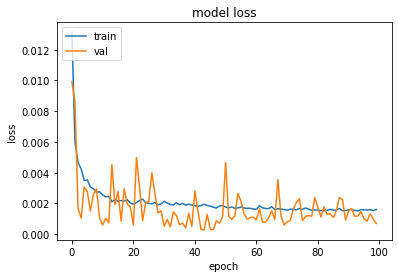

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
!cp '/content/sample_submission (4).csv' '/content/output.csv'

In [23]:
test_data = pd.read_csv('/content/sample_submission (4).csv')
out_data  = pd.read_csv('/content/output.csv')
test_set = val_data.iloc[len(val_data)-60:,1:2].values
print(len(test_set))
print(test_set.shape)

60
(60, 1)


In [24]:
print(len(test_data))
print(test_data.head())
test_data_date = test_data.iloc[:,0:1].values
print(test_data_date[0:5])

1904
         date     value
0  2013-06-24  0.076290
1  2013-06-25  0.326099
2  2013-06-26  0.156191
3  2013-06-27  0.118831
4  2013-06-28  0.676266
[['2013-06-24']
 ['2013-06-25']
 ['2013-06-26']
 ['2013-06-27']
 ['2013-06-28']]


In [25]:
print(out_data['date'][0])

2013-06-24


In [27]:
from pickle import dump
# save the model
model.save_weights("model.h5")
print("Saved model to disk")
# save the scaler
dump(sc, open('scaler.pkl', 'wb'))

Saved model to disk


In [29]:
from pickle import load
model.load_weights("model.h5")
print("Loaded model from disk")
scaler = load(open('scaler.pkl', 'rb'))

Loaded model from disk


In [30]:
test_set_scaled = scaler.transform(test_set)
for i in range(len(test_data_date)):
  print(i)
  #print(test_set_scaled.shape)
  X_test = test_set_scaled[i:60+i,0]
  #print(X_test.shape)
  X_test = np.reshape(X_test,(X_test.shape[0],1))
  X_test = np.expand_dims(X_test,axis=0)
  #print(X_test.shape)
  Y_pred = model.predict(X_test)
  test_set_scaled = np.append(test_set_scaled,Y_pred, axis=0)
  predicted_stock = sc.inverse_transform(Y_pred)
  #out_df.append([test_data_date[i],predicted_stock])
  
  #val = str(test_data_date[i]).lstrip('[').rstrip(']')
  #print(val)
  print(predicted_stock.flatten())
  val = ''.join(test_data_date[i].flatten())
  print(val)
  #out_data['date'][str(val)] =  predicted_stock.flatten()
  out_data.loc[out_data.date == str(val),'value'] = predicted_stock.flatten()
 


  

Streaming output truncated to the last 5000 lines.
[16875.424]
2014-06-03
238
[16875.424]
2014-06-04
239
[16875.424]
2014-06-05
240
[16875.424]
2014-06-06
241
[16875.424]
2014-06-09
242
[16875.424]
2014-06-10
243
[16875.424]
2014-06-11
244
[16875.424]
2014-06-12
245
[16875.424]
2014-06-13
246
[16875.424]
2014-06-16
247
[16875.424]
2014-06-17
248
[16875.424]
2014-06-18
249
[16875.424]
2014-06-19
250
[16875.424]
2014-06-20
251
[16875.424]
2014-06-23
252
[16875.424]
2014-06-24
253
[16875.424]
2014-06-25
254
[16875.424]
2014-06-26
255
[16875.424]
2014-06-27
256
[16875.424]
2014-06-30
257
[16875.422]
2014-07-01
258
[16875.424]
2014-07-02
259
[16875.424]
2014-07-03
260
[16875.422]
2014-07-07
261
[16875.424]
2014-07-08
262
[16875.422]
2014-07-09
263
[16875.424]
2014-07-10
264
[16875.422]
2014-07-11
265
[16875.422]
2014-07-14
266
[16875.424]
2014-07-15
267
[16875.422]
2014-07-16
268
[16875.422]
2014-07-17
269
[16875.422]
2014-07-18
270
[16875.422]
2014-07-21
271
[16875.422]
2014-07-22
272
[168

In [31]:
print(out_data.head())

         date         value
0  2013-06-24  17407.595703
1  2013-06-25  17454.417969
2  2013-06-26  17412.000000
3  2013-06-27  17350.236328
4  2013-06-28  17327.998047


In [73]:
# df = pd.DataFrame(out_data, columns = ['date', 'value']) 
# print(df.head())

           date           value
0  [2013-06-24]  [[-47.499165]]
1  [2013-06-25]   [[-47.51666]]
2  [2013-06-26]   [[-47.51827]]
3  [2013-06-27]   [[-47.49813]]
4  [2013-06-28]  [[-47.450253]]


In [32]:
out_data.to_csv('file3.csv',index=False)